In [4]:
import matplotlib.pyplot as plt
import os
from my_imfilter import *
import pandas as pd
import cv2
from os.path import join
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from skimage.transform import rescale, resize, downscale_local_mean

In [5]:
plt.close('all') # closes all figures

In [6]:
#%% Setup
#% read images and convert to floating point format
image1 = mpimg.imread('dog.bmp')
image2 = mpimg.imread('cat.bmp')

"""
% Several additional test cases are provided for you, but feel free to make
% your own (you'll need to align the images in a photo editor such as
% Photoshop). The hybrid images will differ depending on which image you
% assign as image1 (which will provide the low frequencies) and which image
% you asign as image2 (which will provide the high frequencies)
"""

""" %% Filtering and Hybrid Image construction """
cutoff_frequency = 7  

"""This is the standard deviation, in pixels, of the 
% Gaussian blur that will remove the high frequencies from one image and 
% remove the low frequencies from another image (by subtracting a blurred
% version from the original version). You will want to tune this for every
% image pair to get the best results. """
df=pd.read_excel('gauss.xlsx')
df=df.to_numpy()
#print(df.shape)
filter = np.asarray(df)#insert values from fspecial('Gaussian', cutoff_frequency*4+1, cutoff_frequency) here
#print(filter.shape)
"""
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% YOUR CODE BELOW. Use my_imfilter to create 'low_frequencies' and
% 'high_frequencies' and then combine them to create 'hybrid_image'
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Remove the high frequencies from image1 by blurring it. The amount of
% blur that works best will vary with different image pairs
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
"""

low_frequencies = my_imfilter(image1,filter)

"""
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Remove the low frequencies from image2. The easiest way to do this is to
% subtract a blurred version of image2 from the original version of image2.
% This will give you an image centered at zero with negative values.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
blur_image2=my_imfilter(image2,filter)
high_frequencies = image2-blur_image2

"""
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Combine the high frequencies and low frequencies
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
hybrid_image = low_frequencies+high_frequencies 

In [7]:
from vis_hybrid_image import*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


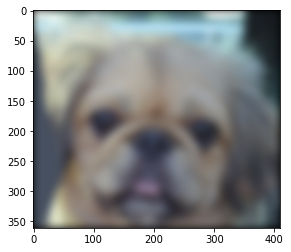

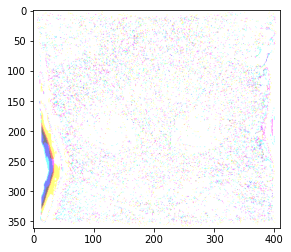

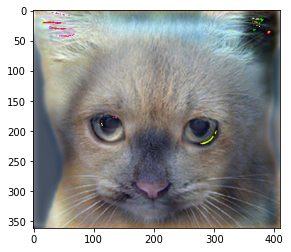

In [8]:
#%% Visualize and save outputs

plt.figure(1)
plt.imshow(low_frequencies)
plt.figure(2)
plt.imshow(high_frequencies + 0.5);
vis = vis_hybrid_image(hybrid_image) #see function script vis_hybrid_image.py
plt.figure(3)
plt.imshow(hybrid_image)
mpimg.imsave('low_frequencies.jpg',low_frequencies)
mpimg.imsave('high_frequencies.jpg',high_frequencies)
mpimg.imsave('hybrid_image.jpg',hybrid_image)
mpimg.imsave('hybrid_image_scales.jpg',vis)